In [9]:
import os
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from statsmodels.graphics.regressionplots import plot_partregress

# 한글 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows의 경우 맑은 고딕
plt.rcParams["axes.unicode_minus"] = False    # 축에 있는 마이너스 기호 깨짐

In [2]:
datasPath = os.path.join(os.getcwd(), "..", "final_data.csv")
print(f"file path : {datasPath}")
data = pd.read_csv(datasPath, encoding='utf-8')
data.head()
vars_list = list(data.columns)
print(vars_list)

file path : c:\Users\limul\Desktop\College\2_grade\2_semester\computational_statistics\teamProject\2024-2-CSP\newsData\data_visual\..\final_data.csv
['주차', '기간', '기사 갯수', '오염', '환경 오염', '생물 멸종', '산성비', '수질 오염', '기후 위기', '온난화 가속화', '오존층 파괴', '유해 물질 누출', '이산화탄소', '주간 뉴스 수', '뉴스 비율']


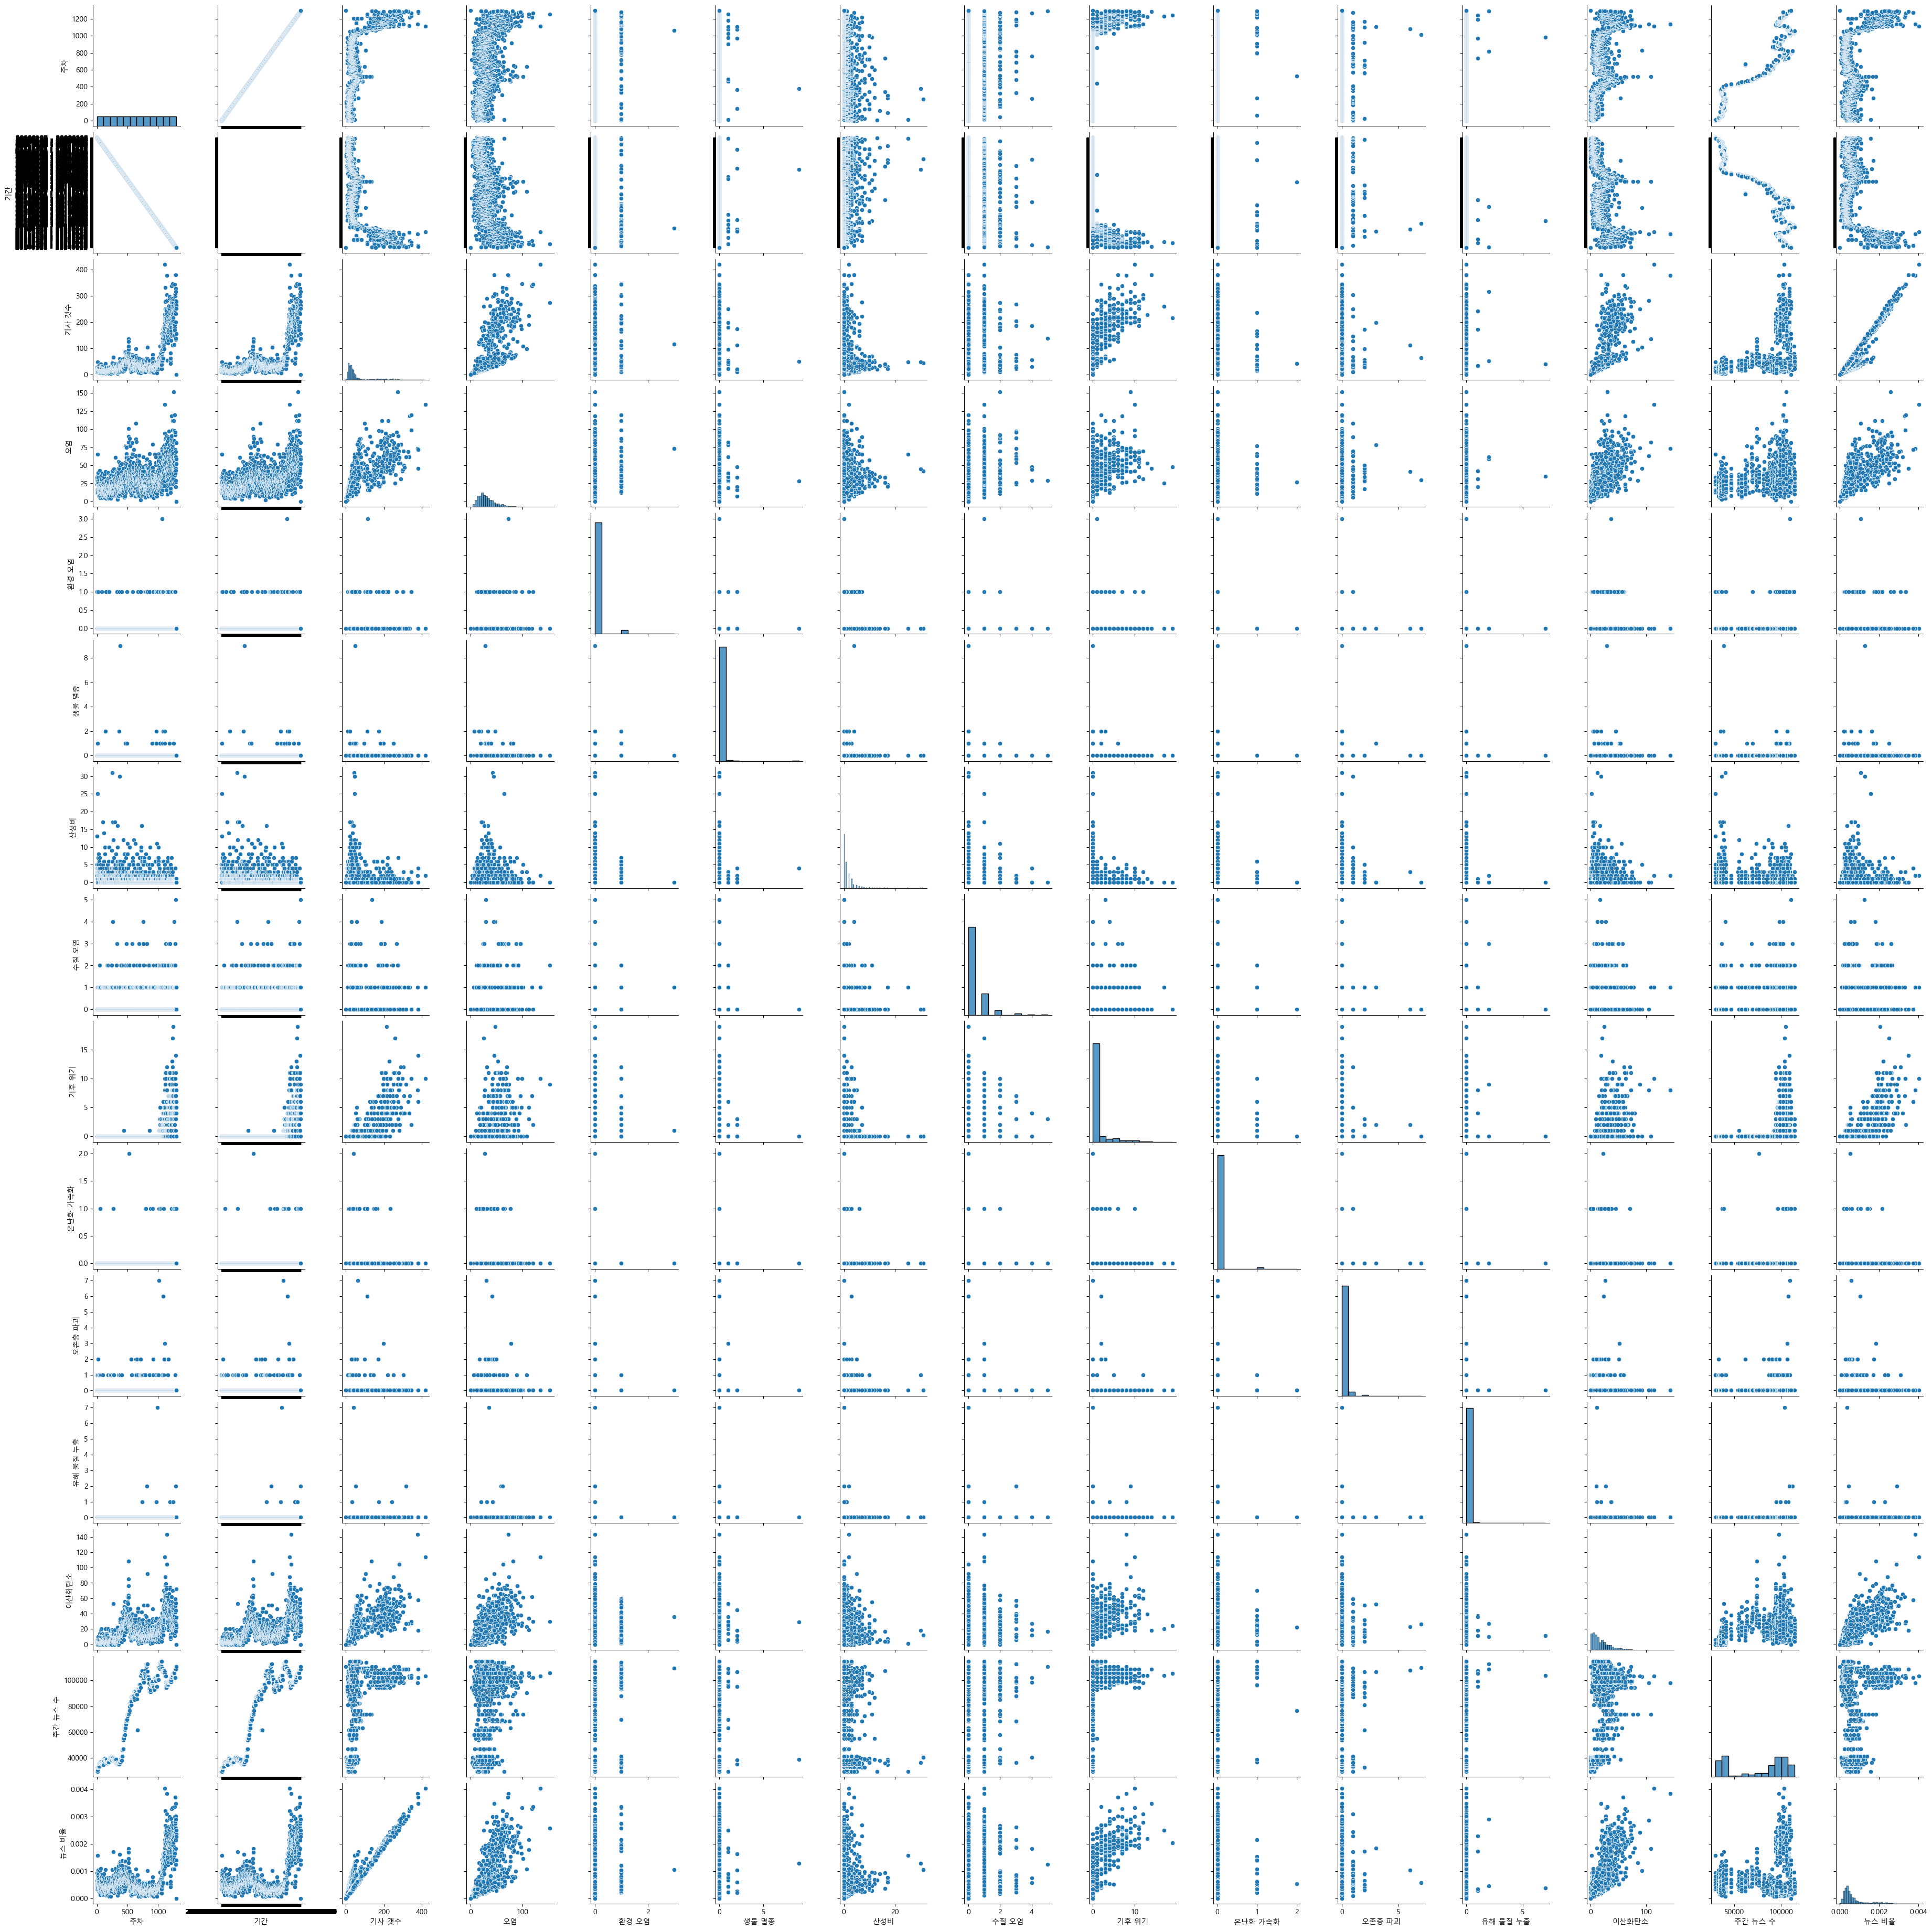

In [3]:
sns.pairplot(data=data, vars=vars_list, kind='scatter', dropna=True)

In [4]:
data.corr(method='pearson', numeric_only=True)

,주차,기사 갯수,오염,환경 오염,생물 멸종,산성비,수질 오염,기후 위기,온난화 가속화,오존층 파괴,유해 물질 누출,이산화탄소,주간 뉴스 수,뉴스 비율
주차,1.000000,0.667572,0.512951,0.097072,0.002789,-0.206254,0.109362,0.535706,0.086607,0.009673,0.052461,0.549718,0.910800,0.498111
기사 갯수,0.667572,1.000000,0.716260,0.105996,0.012050,-0.084963,0.129693,0.813559,0.038395,0.005437,0.029133,0.737743,0.458418,0.964598
오염,0.512951,0.716260,1.000000,0.136433,0.002510,0.030273,0.235364,0.466077,0.033438,0.036821,0.027940,0.612894,0.416993,0.709209
환경 오염,0.097072,0.105996,0.136433,1.000000,0.038553,-0.002308,-0.016317,0.050008,-0.021991,-0.000753,-0.009849,0.063006,0.084042,0.095286
생물 멸종,0.002789,0.012050,0.002510,0.038553,1.000000,0.020617,-0.020521,-0.006746,-0.009140,0.008265,-0.004094,0.026453,-0.018709,0.032759
산성비,-0.206254,-0.084963,0.030273,-0.002308,0.020617,1.000000,-0.048454,-0.090923,-0.009247,0.033509,-0.023245,-0.074513,-0.197710,-0.003214
수질 오염,0.109362,0.129693,0.235364,-0.016317,-0.020521,-0.048454,1.000000,0.083438,-0.010549,-0.014629,0.013780,0.063150,0.090943,0.120189
기후 위기,0.535706,0.813559,0.466077,0.050008,-0.006746,-0.090923,0.083438,1.000000,0.047574,-0.010177,0.028536,0.502895,0.337609,0.777836
온난화 가속화,0.086607,0.038395,0.033438,-0.021991,-0.009140,-0.009247,-0.010549,0.047574,1.000000,-0.004560,-0.006368,0.045273,0.084205,0.015693
오존층 파괴,0.009673,0.005437,0.036821,-0.000753,0.008265,0.033509,-0.014629,-0.010177,-0.004560,1.000000,-0.009339,0.002406,0.023957,0.005133


In [17]:
# 숫자형 열만 선택하여 상관계수 행렬 계산
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

# '주차'와 가장 상관관계가 높은 두 변수 찾기
tax_corr = correlation_matrix['주차'].abs().sort_values(ascending=False)
corr_increase = tax_corr.index[1:]  # 'TAX'를 제외한 상위 2개 변수 선택

# 상관관계가 높은 변수 출력
print("주차와 상관관계가 높은 변수 2개:", corr_increase.tolist())
print("상관계수:", tax_corr[corr_increase].values)

주차와 상관관계가 높은 변수 2개: ['주간 뉴스 수', '기사 갯수', '이산화탄소', '기후 위기', '오염', '뉴스 비율', '산성비', '수질 오염', '환경 오염', '온난화 가속화', '유해 물질 누출', '오존층 파괴', '생물 멸종']
상관계수: [0.9107997  0.66757156 0.54971766 0.53570618 0.51295145 0.49811115
 0.20625435 0.10936201 0.0970717  0.08660722 0.05246109 0.00967322
 0.00278862]


<Figure size 800x600 with 0 Axes>

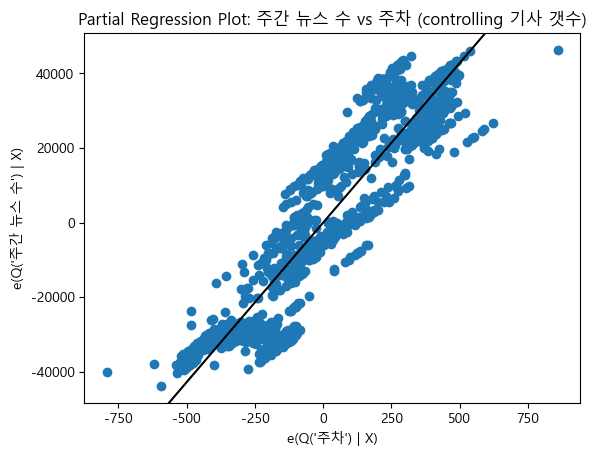

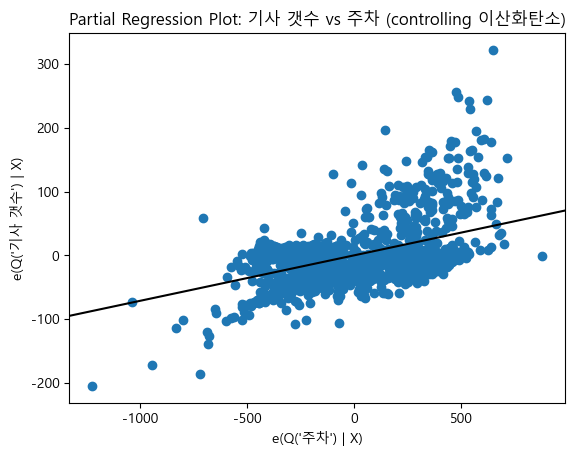

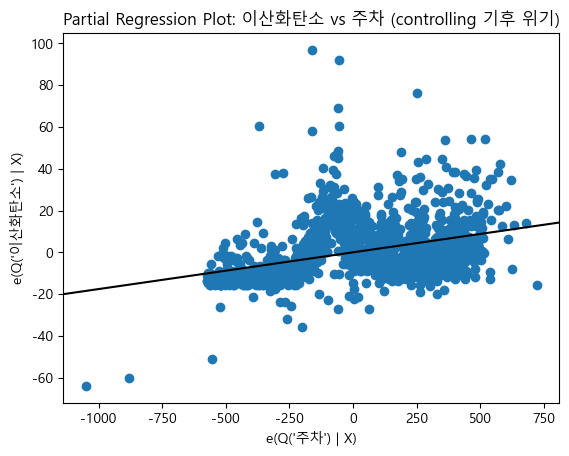

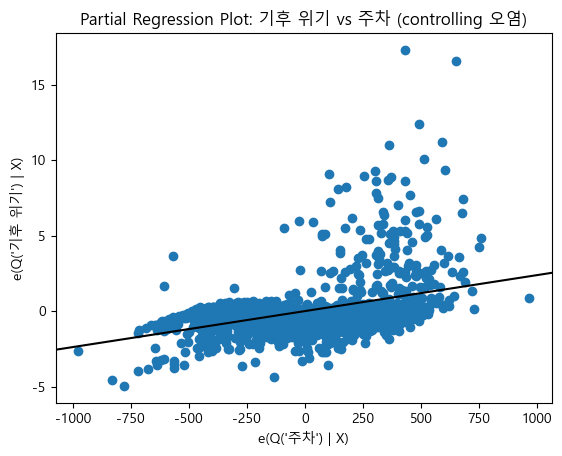

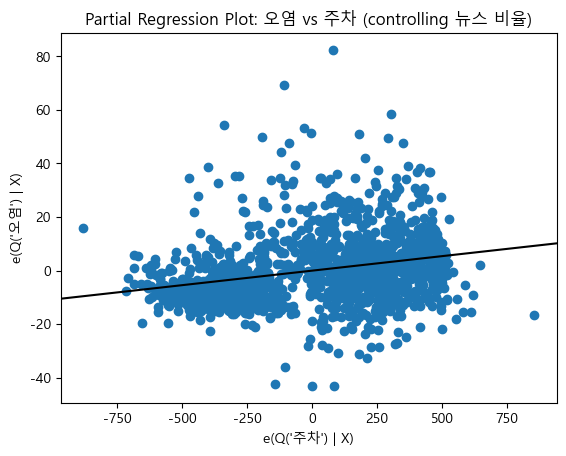

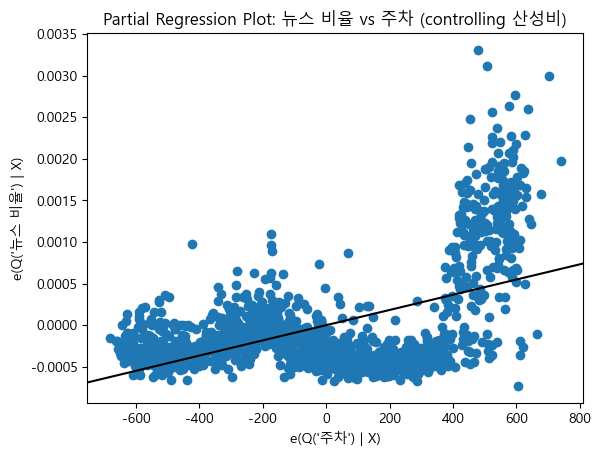

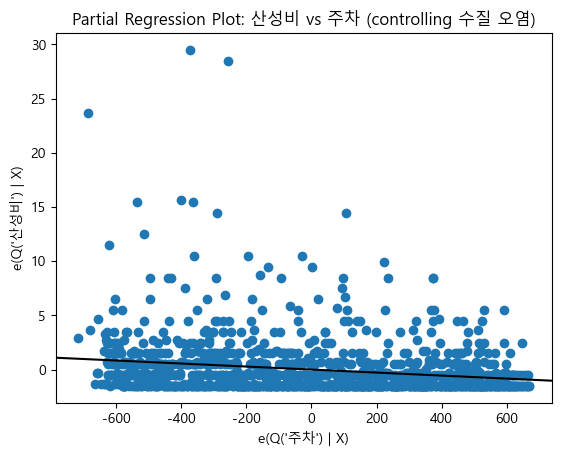

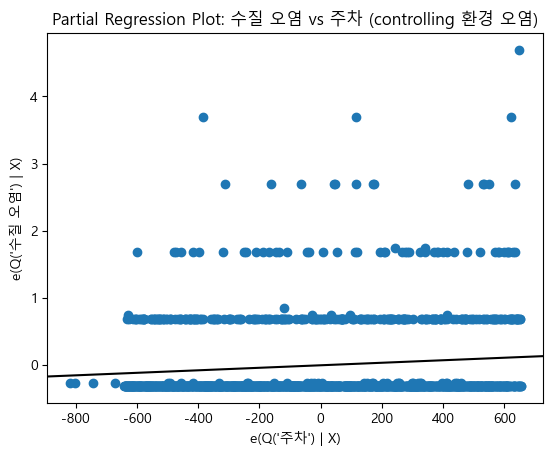

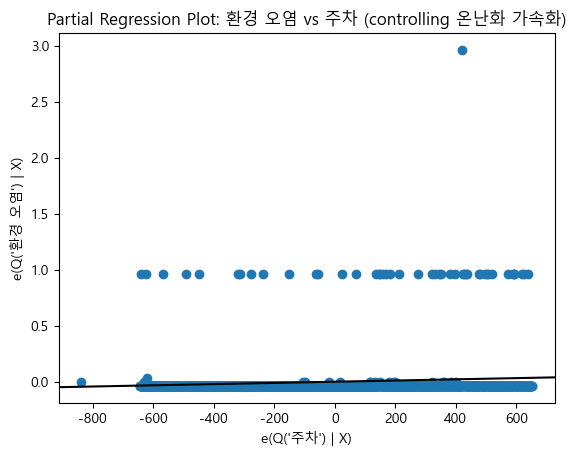

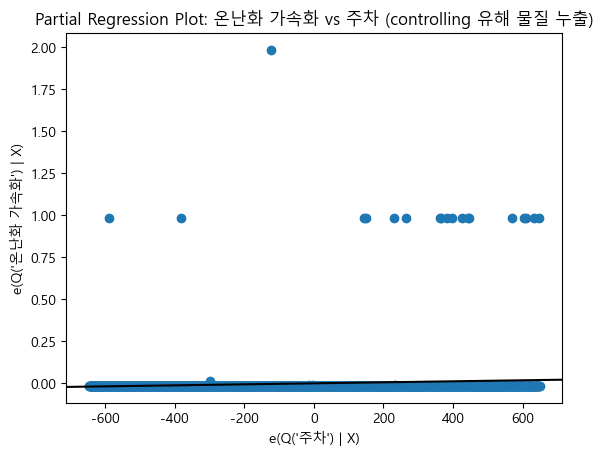

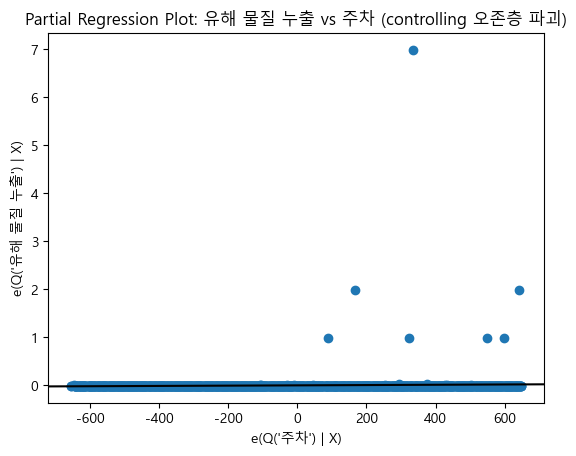

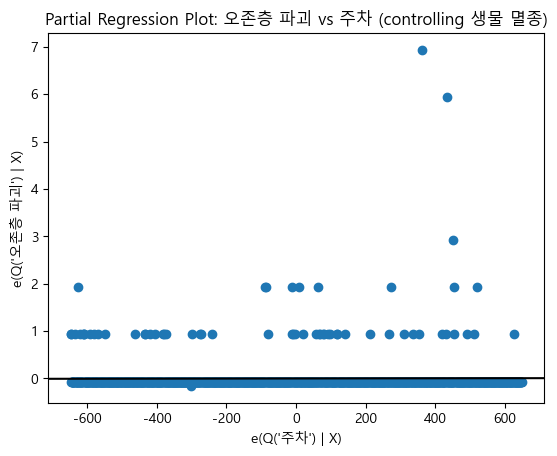

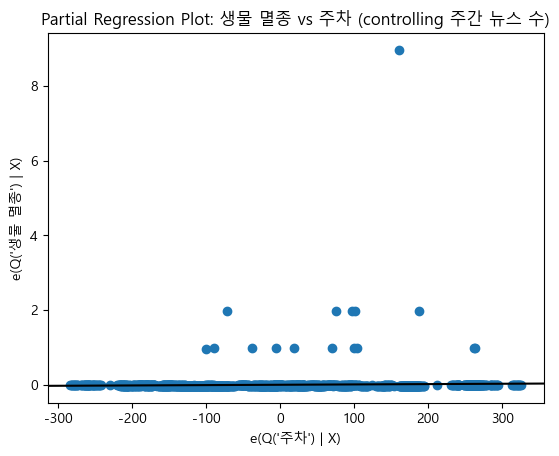

In [20]:
# 부분 회귀 플롯
plt.figure(figsize=(8, 6))
for idx in range(len(corr_increase)):
    plot_partregress(endog=f"Q('{corr_increase[idx]}')", exog_i="Q('주차')", exog_others=f"Q('{corr_increase[idx+1 if idx != len(corr_increase)-1 else 0]}')", data=data, obs_labels=False)
    plt.title(f"Partial Regression Plot: {corr_increase[idx]} vs 주차 (controlling {corr_increase[idx+1 if idx != len(corr_increase)-1 else 0]})")
    plt.show()